In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting(use_latex=True, pretty_print=False)

# Generalized coordinates

In [2]:
q1, q2, q3 = me.dynamicsymbols('q1, q2, q3')

# Generalized speeds

In [3]:
u1, u2, u3 = me.dynamicsymbols('u1, u2, u3')

# Specified Inputs

In [4]:
F, T = me.dynamicsymbols('F, T')

# Constants

In [5]:
k, c, ma, mb, mc, IB_bo, l, kT, g = sm.symbols('k, c, m_a, m_b, m_c, I_{B_bo}, l, k_T, g')
IB_bo

# Reference Frames

In [6]:
N = me.ReferenceFrame('N')

In [7]:
B = N.orientnew('B', 'Axis', (q2, N.z))

In [8]:
C = B.orientnew('C', 'Axis', (q3, N.z))

# Kinematic Differential Equations

$$
u_i = \dot{q}_i \\
0 = u_i - \dot{q}_i
$$


In [9]:
kdes = [u1 - q1.diff(),
        u2 - q2.diff(),
        u3 - q3.diff()]
kdes

# Angular Velocities

In [10]:
B.set_ang_vel(N, u2 * N.z)

In [11]:
C.set_ang_vel(B, u3 * N.z)

# Points

In [12]:
O = me.Point('O')

In [13]:
Pab = O.locatenew('P_{ab}', q1 * N.x)

In [14]:
Bo = Pab.locatenew('B_o', - 2 * l / 3 * B.y)

In [15]:
Pbc = Pab.locatenew('P_{bc}', -l * B.y)

In [16]:
Pc = Pbc.locatenew('P_c', -l * C.y)

In [17]:
Pc.pos_from(O)

# Linear Velocities

In [18]:
Pab.set_vel(N, u1 * N.x)

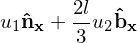

In [19]:
Bo.v2pt_theory(Pab, N, B)

In [20]:
Pbc.v2pt_theory(Pab, N, B)

In [21]:
Pc.v2pt_theory(Pbc, N, C)

# Partial Velocities

In [22]:
Pab.vel(N).diff(u1, N)

In [23]:
Pab.partial_velocity(N, u1)

In [24]:
Pab.partial_velocity(N, u1, u2, u3)

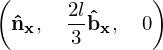

In [25]:
Bo.partial_velocity(N, u1, u2, u3)

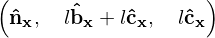

In [26]:
Pc.partial_velocity(N, u1, u2, u3)

In [27]:
B.partial_velocity(N, u1, u2, u3)

In [28]:
[B.ang_vel_in(N).diff(ur, N) for ur in [u1, u2, u3]]

# Angular Accelerations

In [29]:
alpha_B_N = B.ang_acc_in(N)
alpha_B_N

In [30]:
a_Pab_N = Pab.acc(N)
a_Pab_N

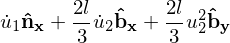

In [31]:
a_Bo_N = Bo.acc(N)
a_Bo_N

In [32]:
a_Pc_N = Pc.acc(N)
a_Pc_N

# Loads (forces and torques)

In [33]:
Rab = (F - k * q1 - c * u1) * N.x
Rab

In [34]:
Rbo = -(mb * g) * N.y
Rbo

In [35]:
Rc = -(mc * g) * N.y
Rc

In [36]:
TB = (T + kT * q3) * N.z
TB

# Mass and Inertia

In [37]:
IB = me.inertia(B, 0, 0, IB_bo)
IB

In [38]:
ma, mc

# Particles and Bodies

In [39]:
slider = me.Particle('slider', Pab, ma)
bob = me.Particle('bob', Pc, mc)

In [40]:
pend = me.RigidBody('pend', Bo, B, mb, (IB, Bo))

In [41]:
bodies = [slider, bob, pend]

# Loads (forces and torques)

In [42]:
loads = [(Pab, Rab),
         (Pc, Rc),
         (Bo, Rbo),
         (B, TB)]

In [43]:
q = sm.Matrix([q1, q2, q3])
u = sm.Matrix([u1, u2, u3])

In [44]:
kane = me.KanesMethod(N, q, u, kd_eqs=kdes)

In [45]:
Fr, Frstar = kane.kanes_equations(bodies, loads)

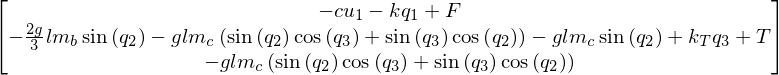

In [46]:
Fr

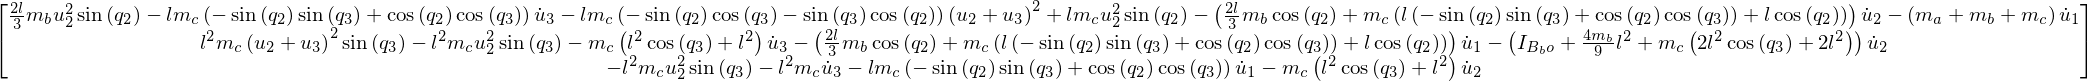

In [47]:
Frstar

# Simulation

In [48]:
import numpy as np
from pydy.system import System

Simulate for 5 seconds and return the values of the states every 5 ms. Use a 1D numpy array to specify this.

In [49]:
times = np.linspace(0.0, 5.0, num=1001)

In [50]:
times

array([ 0.   ,  0.005,  0.01 , ...,  4.99 ,  4.995,  5.   ])

In [51]:
times.shape

Create dictionaries that map numeric values to each symbol in the equations of motion. Make sure your units are consistent!

In [52]:
constants = {l: 1.0,  # meter
             g: 9.81, # meter per second squared
             k: 50.0,  # Newton per meter
             c: 0.05,  # kilogram second
             kT: 10.0,  # Newton meter per radian
             ma: 0.5,  # kilogram
             mb: 0.5,  # kilogram
             IB_bo: 0.5 * 0.5**2,  # kg m**2
             mc:  0.5}  # meter

specifieds = {F: 0.0,
              T: 0.0}

init_cond = {q1: 0.05,
             q2: 0.0,
             q3: 0.0,
             u1: 0.0,
             u2: 0.0,
             u3: 0.0}


sys = System(kane,
             constants=constants,
             specifieds=specifieds,
             initial_conditions=init_cond,
             times=times
            )

In [53]:
sys.constants

Simulate the system by integrating the equations of motion. `sys.integrate()` returns a 2D NumPy array of the state trajectories.

In [54]:
traj = sys.integrate()

In [55]:
type(traj)

numpy.ndarray

In [56]:
traj.shape

# Plot the state trajectories

In [57]:
import matplotlib.pyplot as plt

The following line enables interactive notebook plotting.

In [58]:
%matplotlib notebook

<IPython.core.display.Javascript object>


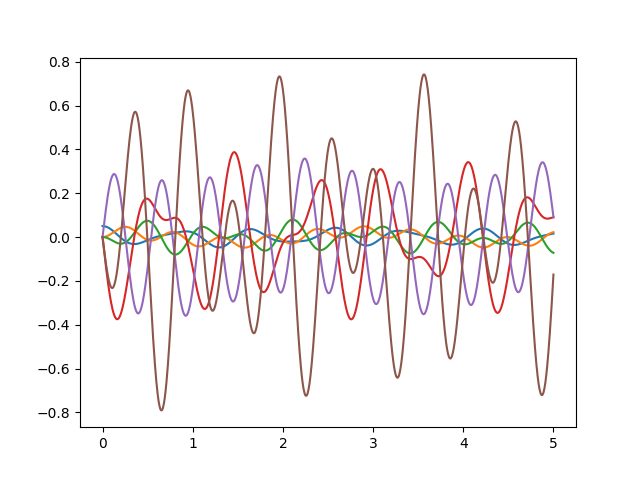

In [59]:
plt.figure()
plt.plot(sys.times, traj);

# Make a better plot with more info

<IPython.core.display.Javascript object>


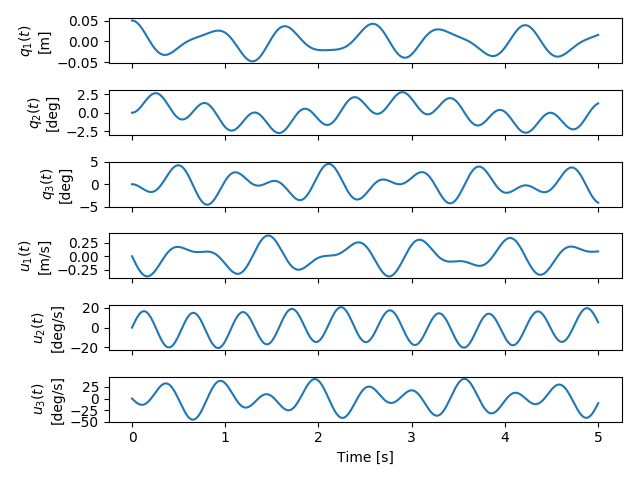

In [60]:
x = [q1, q2, q3, u1, u2, u3]
units = ['m', 'deg', 'deg', 'm/s', 'deg/s', 'deg/s']

# lambda functions to do quick unit conversions
convert = [lambda x: x,
           lambda x : np.rad2deg(x),
           lambda x: np.rad2deg(x),
           lambda x: x,
           lambda x : np.rad2deg(x),
           lambda x: np.rad2deg(x),
          ]

fig, axes = plt.subplots(6, 1, sharex=True)

for i in range(6):
    axes[i].plot(sys.times, convert[i](traj[:, i]))
    axes[i].set_ylabel(sm.latex(x[i], mode='inline') + '\n[' + units[i] + ']')
    
axes[-1].set_xlabel('Time [s]')

plt.tight_layout()

# Animating the motion with Matplotlib's animation tools

Start by getting the equations that specify the locations of all the points that you want to draw:

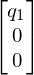

In [61]:
Pab.pos_from(O).to_matrix(N)

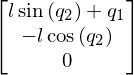

In [62]:
Pbc.pos_from(O).to_matrix(N)

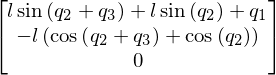

In [63]:
Pc.pos_from(O).to_matrix(N).simplify()

In [64]:
sys.initial_conditions

# Make an initial plot using the initial conditions

Careful about mixing symbols as numbers!! That's why I introduced new variable names with `_n`.

<IPython.core.display.Javascript object>


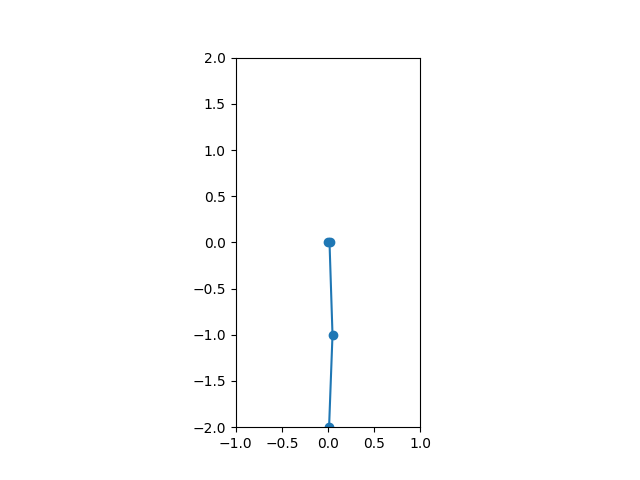

In [65]:
fig, ax = plt.subplots(1, 1)

l_n = sys.constants[l]
q1_n = sys.initial_conditions[q1]
q2_n = sys.initial_conditions[q2]
q3_n = sys.initial_conditions[q3]

lines = ax.plot(# x coordinates
                [0,
                 q1_n,
                 l_n * np.sin(q2_n) + q1_n,
                 l_n * np.sin(q2_n + q3_n) + l_n * np.sin(q2_n) + q1_n],
                # y coordinates
                [0,
                 0,
                 -l_n * np.cos(q2_n),
                 -l_n*(np.cos(q2_n + q3_n) + np.cos(q2_n))], marker='o')

ax.set_aspect('equal')
ax.set_ylim((-2.0, 2.0))
ax.set_xlim([-1.0, 1.0])

Notice that `lines` is a list of matplotlib lines with one item.  

In [66]:
lines

In [67]:
type(lines)

list

In [68]:
len(lines)

The xy data can be accessed with:

In [69]:
lines[0].get_data()

(array([ 0.  ,  0.05,  0.05,  0.05]), array([ 0.,  0., -1., -2.]))

Create a function that takes in the number of the animation frame and sets the line's xy data to the updated values.

In [70]:
def update(i):
    
    # grab the ith values of the coordinates
    q1_n = traj[i, 0]
    q2_n = traj[i, 1]
    q3_n = traj[i, 2]
    
    # update the line's data
    lines[0].set_data([0,
                       q1_n,
                       l_n * np.sin(q2_n) + q1_n,
                       l_n * np.sin(q2_n + q3_n) + l_n * np.sin(q2_n) + q1_n],
                      [0,
                       0,
                       -l_n * np.cos(q2_n),
                       -l_n*(np.cos(q2_n + q3_n) + np.cos(q2_n))])    

If you call update with a value between 0 and 1000, you can see what the system configuration is at that time.

In [71]:
update(100)

Now pass in the figure, number of frames, and the update function to `FuncAnimation`.

In [72]:
from matplotlib.animation import FuncAnimation

In [73]:
ani = FuncAnimation(fig, update, frames=len(traj), interval=5)

**For some reason the animation will not start without calling `update` after the animation call. I can't figure out why this is needed. It usually isn't...**

In [74]:
update(1)

Now try other initial conditions and see how the system behaves.